In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as dates
import calplot
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [2]:
df_all = pd.read_csv('final_data_all_features.csv')
df_fil = pd.read_csv('final_data_filtered_feat.csv')

In [3]:
def get_train_test(df,date='2019-09-09'):
    df['Date_label']= pd.to_datetime(df['Date_label'])
    test_df = df[df['Date_label'] >= date]
    train_df = df[df['Date_label'] < date]
    print(test_df.shape,train_df.shape)
    X_train, y_train = train_df.drop(['Date_label','sum_QTY_label'],axis=1), train_df['sum_QTY_label']
    X_test, y_test = test_df.drop(['Date_label','sum_QTY_label'],axis=1), test_df['sum_QTY_label']
    return (X_train,y_train),(X_test, y_test),(train_df,test_df)

In [21]:
def xgb_train(X_train,y_train,X_test,y_test,eval_metric='rmse'):
    xgb = XGBRegressor(n_estimators=10000, learning_rate=0.001)
    xgb.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=eval_metric,
        early_stopping_rounds=10)
    return xgb

In [16]:
def plot_predictions(X_test,test_df,df,model):
    predictions = model.predict(X_test)
    test_df = test_df.reset_index().drop('index', axis=1)
    test_df['predictions'] = pd.Series(predictions)
    times = pd.date_range(start='2018-01-11',end='2019-12-31',freq='M')
    plt.figure(figsize=(20, 5))
    plt.plot(df.Date_label, df.sum_QTY_label)
    plt.plot(test_df.Date_label, test_df.predictions,color='red')
    plt.xticks(times,rotation=90)
    plt.show()

# ALL FEATURES

In [32]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_all)

(53, 42) (199, 42)


[0]	validation_0-rmse:1257.20160	validation_1-rmse:1637.15153
[1]	validation_0-rmse:1256.42003	validation_1-rmse:1636.72909
[2]	validation_0-rmse:1255.65083	validation_1-rmse:1636.30753
[3]	validation_0-rmse:1254.88230	validation_1-rmse:1635.88691
[4]	validation_0-rmse:1254.11448	validation_1-rmse:1635.46718
[5]	validation_0-rmse:1253.34736	validation_1-rmse:1635.04837
[6]	validation_0-rmse:1252.58091	validation_1-rmse:1634.63046
[7]	validation_0-rmse:1251.81524	validation_1-rmse:1634.21346
[8]	validation_0-rmse:1251.04911	validation_1-rmse:1633.79658
[9]	validation_0-rmse:1250.28375	validation_1-rmse:1633.38062
[10]	validation_0-rmse:1249.52014	validation_1-rmse:1632.96635
[11]	validation_0-rmse:1248.75617	validation_1-rmse:1632.55218
[12]	validation_0-rmse:1247.99289	validation_1-rmse:1632.13890
[13]	validation_0-rmse:1247.23033	validation_1-rmse:1631.72652
[14]	validation_0-rmse:1246.46952	validation_1-rmse:1631.31583
[15]	validation_0-rmse:1245.70834	validation_1-rmse:1630.90523
[1

C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:1225.42568	validation_1-rmse:1620.09399
[43]	validation_0-rmse:1224.68482	validation_1-rmse:1619.70864
[44]	validation_0-rmse:1223.94359	validation_1-rmse:1619.31815
[45]	validation_0-rmse:1223.20306	validation_1-rmse:1618.93380
[46]	validation_0-rmse:1222.46321	validation_1-rmse:1618.54501
[47]	validation_0-rmse:1221.72507	validation_1-rmse:1618.16306
[48]	validation_0-rmse:1220.98654	validation_1-rmse:1617.77599
[49]	validation_0-rmse:1220.24873	validation_1-rmse:1617.38977
[50]	validation_0-rmse:1219.51260	validation_1-rmse:1617.01036
[51]	validation_0-rmse:1218.77559	validation_1-rmse:1616.62585
[52]	validation_0-rmse:1218.03976	validation_1-rmse:1616.24222
[53]	validation_0-rmse:1217.30463	validation_1-rmse:1615.86463
[54]	validation_0-rmse:1216.57064	validation_1-rmse:1615.48863
[55]	validation_0-rmse:1215.83683	validation_1-rmse:1615.10754
[56]	validation_0-rmse:1215.10313	validation_1-rmse:1614.72720
[57]	validation_0-rmse:1214.37065	validation_1-rmse:161

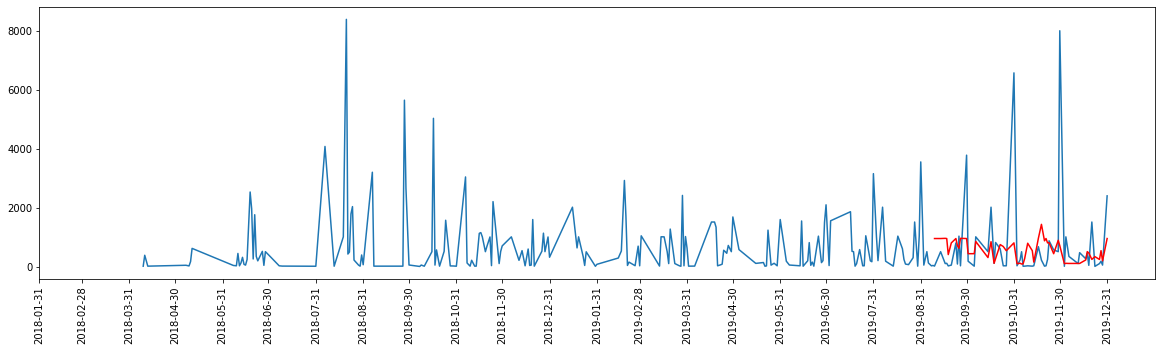

In [33]:
xgb = xgb_train(X_train,y_train,X_test,y_test)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb)

[0]	validation_0-mae:675.21889	validation_1-mae:701.89581
[1]	validation_0-mae:674.66188	validation_1-mae:701.10366
[2]	validation_0-mae:674.09989	validation_1-mae:700.31219
[3]	validation_0-mae:673.53838	validation_1-mae:699.52143
[4]	validation_0-mae:672.97734	validation_1-mae:698.73136
[5]	validation_0-mae:672.41679	validation_1-mae:697.94197
[6]	validation_0-mae:671.85670	validation_1-mae:697.15329
[7]	validation_0-mae:671.29711	validation_1-mae:696.43084
[8]	validation_0-mae:670.73782	validation_1-mae:695.75227
[9]	validation_0-mae:670.17902	validation_1-mae:695.10102
[10]	validation_0-mae:669.62138	validation_1-mae:694.45359
[11]	validation_0-mae:669.06494	validation_1-mae:693.80347
[12]	validation_0-mae:668.50897	validation_1-mae:693.15392
[13]	validation_0-mae:667.95348	validation_1-mae:692.50494
[14]	validation_0-mae:667.40480	validation_1-mae:691.90225
[15]	validation_0-mae:666.86608	validation_1-mae:691.40357
[16]	validation_0-mae:666.32782	validation_1-mae:690.90532
[17]	va

C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-mae:650.99259	validation_1-mae:678.14512
[47]	validation_0-mae:650.51747	validation_1-mae:677.81539
[48]	validation_0-mae:650.04494	validation_1-mae:677.46765
[49]	validation_0-mae:649.57281	validation_1-mae:677.12020
[50]	validation_0-mae:649.10000	validation_1-mae:676.80293
[51]	validation_0-mae:648.63982	validation_1-mae:676.48487
[52]	validation_0-mae:648.17024	validation_1-mae:676.17430
[53]	validation_0-mae:647.69974	validation_1-mae:675.88169
[54]	validation_0-mae:647.24454	validation_1-mae:675.59444
[55]	validation_0-mae:646.78018	validation_1-mae:675.28541
[56]	validation_0-mae:646.33040	validation_1-mae:674.97664
[57]	validation_0-mae:645.86930	validation_1-mae:674.66817
[58]	validation_0-mae:645.42400	validation_1-mae:674.38196
[59]	validation_0-mae:644.96697	validation_1-mae:674.07403
[60]	validation_0-mae:644.51345	validation_1-mae:673.76637
[61]	validation_0-mae:644.07337	validation_1-mae:673.48095
[62]	validation_0-mae:643.62061	validation_1-mae:673.173

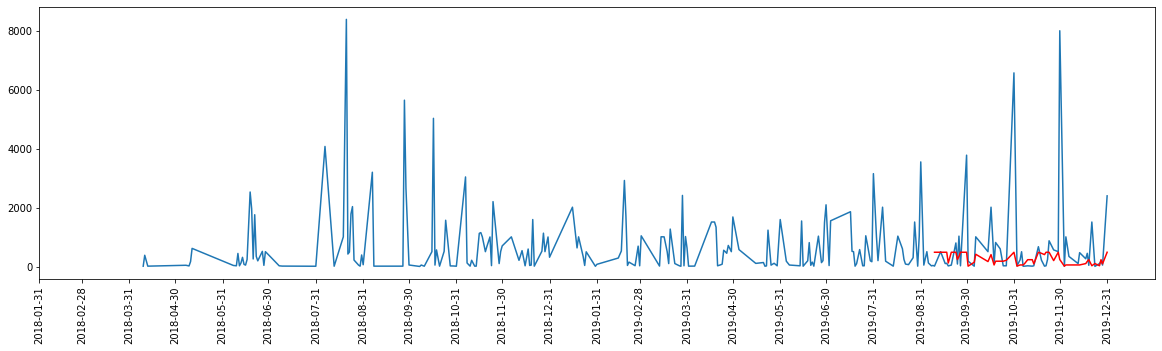

In [34]:
xgb_mae = xgb_train(X_train,y_train,X_test,y_test,eval_metric='mae')
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb_mae)

# FILTERED FEATURES

In [35]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_fil)

(53, 12) (199, 12)


[0]	validation_0-rmse:1257.26719	validation_1-rmse:1637.04934
[1]	validation_0-rmse:1256.55118	validation_1-rmse:1636.52465
[2]	validation_0-rmse:1255.83589	validation_1-rmse:1636.00101
[3]	validation_0-rmse:1255.12128	validation_1-rmse:1635.47823
[4]	validation_0-rmse:1254.40742	validation_1-rmse:1634.95645
[5]	validation_0-rmse:1253.69425	validation_1-rmse:1634.43568
[6]	validation_0-rmse:1252.98150	validation_1-rmse:1633.91580
[7]	validation_0-rmse:1252.26949	validation_1-rmse:1633.39679
[8]	validation_0-rmse:1251.55813	validation_1-rmse:1632.87882
[9]	validation_0-rmse:1250.84754	validation_1-rmse:1632.36182
[10]	validation_0-rmse:1250.13763	validation_1-rmse:1631.84568
[11]	validation_0-rmse:1249.42846	validation_1-rmse:1631.33049
[12]	validation_0-rmse:1248.72025	validation_1-rmse:1630.81925
[13]	validation_0-rmse:1248.01247	validation_1-rmse:1630.30897
[14]	validation_0-rmse:1247.30539	validation_1-rmse:1629.79661
[15]	validation_0-rmse:1246.59899	validation_1-rmse:1629.28823
[1

C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:1221.61417	validation_1-rmse:1611.56060
[52]	validation_0-rmse:1220.92987	validation_1-rmse:1611.08235
[53]	validation_0-rmse:1220.24626	validation_1-rmse:1610.60499
[54]	validation_0-rmse:1219.56357	validation_1-rmse:1610.12848
[55]	validation_0-rmse:1218.88131	validation_1-rmse:1609.65291
[56]	validation_0-rmse:1218.19973	validation_1-rmse:1609.17826
[57]	validation_0-rmse:1217.51880	validation_1-rmse:1608.70452
[58]	validation_0-rmse:1216.83858	validation_1-rmse:1608.23163
[59]	validation_0-rmse:1216.15901	validation_1-rmse:1607.75965
[60]	validation_0-rmse:1215.48013	validation_1-rmse:1607.28859
[61]	validation_0-rmse:1214.80212	validation_1-rmse:1606.81847
[62]	validation_0-rmse:1214.12462	validation_1-rmse:1606.34917
[63]	validation_0-rmse:1213.44771	validation_1-rmse:1605.88080
[64]	validation_0-rmse:1212.77151	validation_1-rmse:1605.41333
[65]	validation_0-rmse:1212.09598	validation_1-rmse:1604.94667
[66]	validation_0-rmse:1211.42110	validation_1-rmse:160

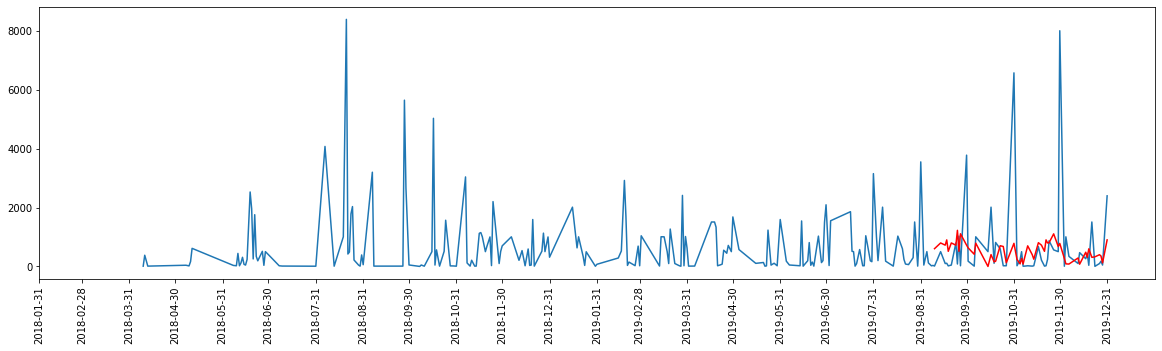

In [36]:
xgb = xgb_train(X_train,y_train,X_test,y_test)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb)

[0]	validation_0-mae:675.20143	validation_1-mae:701.86849
[1]	validation_0-mae:674.62698	validation_1-mae:701.04899
[2]	validation_0-mae:674.05304	validation_1-mae:700.23023
[3]	validation_0-mae:673.47958	validation_1-mae:699.41217
[4]	validation_0-mae:672.90664	validation_1-mae:698.59483
[5]	validation_0-mae:672.33419	validation_1-mae:697.77823
[6]	validation_0-mae:671.76292	validation_1-mae:696.98256
[7]	validation_0-mae:671.19216	validation_1-mae:696.18903
[8]	validation_0-mae:670.62188	validation_1-mae:695.42122
[9]	validation_0-mae:670.05211	validation_1-mae:694.68821
[10]	validation_0-mae:669.48283	validation_1-mae:693.95584
[11]	validation_0-mae:668.91405	validation_1-mae:693.22410
[12]	validation_0-mae:668.34719	validation_1-mae:692.50105
[13]	validation_0-mae:667.78150	validation_1-mae:691.79860
[14]	validation_0-mae:667.21954	validation_1-mae:691.10411
[15]	validation_0-mae:666.66149	validation_1-mae:690.53272
[16]	validation_0-mae:666.10394	validation_1-mae:689.96181
[17]	va

C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\703290650\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-mae:644.09987	validation_1-mae:670.33356
[61]	validation_0-mae:643.64857	validation_1-mae:670.01305
[62]	validation_0-mae:643.19835	validation_1-mae:669.69279
[63]	validation_0-mae:642.74928	validation_1-mae:669.37281
[64]	validation_0-mae:642.30279	validation_1-mae:669.06381
[65]	validation_0-mae:641.85997	validation_1-mae:668.80062
[66]	validation_0-mae:641.41826	validation_1-mae:668.53766
[67]	validation_0-mae:640.97693	validation_1-mae:668.27494
[68]	validation_0-mae:640.53530	validation_1-mae:668.01243
[69]	validation_0-mae:640.09548	validation_1-mae:667.75016
[70]	validation_0-mae:639.66158	validation_1-mae:667.49591
[71]	validation_0-mae:639.22805	validation_1-mae:667.29002
[72]	validation_0-mae:638.79489	validation_1-mae:667.08432
[73]	validation_0-mae:638.36119	validation_1-mae:666.88645
[74]	validation_0-mae:637.92876	validation_1-mae:666.68109
[75]	validation_0-mae:637.49603	validation_1-mae:666.47593
[76]	validation_0-mae:637.06901	validation_1-mae:666.278

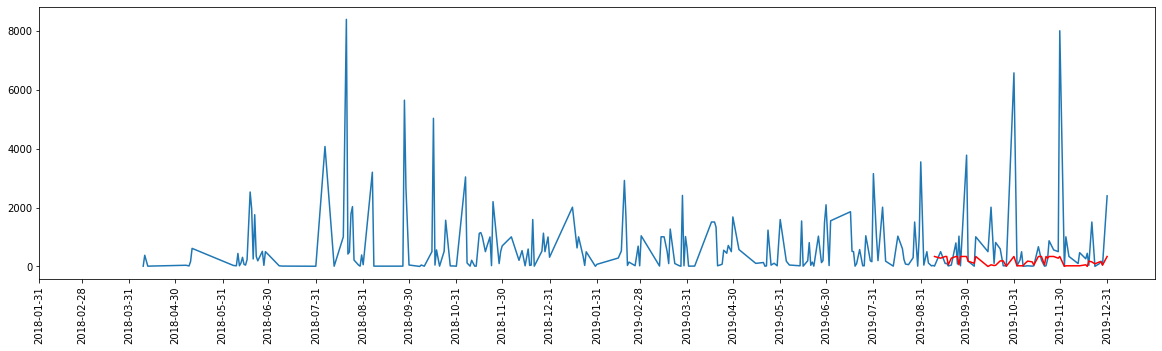

In [37]:
xgb_mae = xgb_train(X_train,y_train,X_test,y_test,eval_metric='mae')
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb_mae)

# Xgboost hyperparameter tuning

### using hyperopt

In [41]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0
    }

In [75]:
def objective(space):
    clf=XGBRegressor( n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), 
                           gamma = space['gamma'], reg_alpha = int(space['reg_alpha']),
                           min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train, eval_set=evaluation, eval_metric="rmse",early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    rmse = mean_squared_error(y_test, pred)
    print ("SCORE:", rmse)
    return {'loss': -rmse, 'status': STATUS_OK }

In [76]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_all)

(53, 42) (199, 42)


In [77]:
import warnings
warnings.filterwarnings("ignore")
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

SCORE:                                                                                                                 
2192475.5933010923                                                                                                     
SCORE:                                                                                                                 
2151754.366970387                                                                                                      
SCORE:                                                                                                                 
2155124.5325853447                                                                                                     
SCORE:                                                                                                                 
2155130.037411956                                                                                                      
SCORE:                                  

In [78]:
best_hyperparams

{'colsample_bytree': 0.8617124604708151,
 'gamma': 4.527610754909901,
 'max_depth': 5.0,
 'min_child_weight': 0.0,
 'reg_alpha': 180.0,
 'reg_lambda': 0.9262815877636171}

In [79]:
clf1=XGBRegressor(colsample_bytree= 0.8617124604708151,
                 gamma= 4.527610754909901,
                 max_depth= 5,
                 min_child_weight= 0,
                 reg_alpha= 180,
                 reg_lambda= 0.9262815877636171,)
clf1.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)

[0]	validation_0-rmse:1063.31661	validation_1-rmse:1503.13921
[1]	validation_0-rmse:909.20408	validation_1-rmse:1459.73043
[2]	validation_0-rmse:829.06665	validation_1-rmse:1438.30355
[3]	validation_0-rmse:746.70304	validation_1-rmse:1435.94921
[4]	validation_0-rmse:669.94802	validation_1-rmse:1427.28384
[5]	validation_0-rmse:617.30583	validation_1-rmse:1442.72593
[6]	validation_0-rmse:567.85925	validation_1-rmse:1444.90069
[7]	validation_0-rmse:520.59884	validation_1-rmse:1457.17900
[8]	validation_0-rmse:461.98644	validation_1-rmse:1468.13677
[9]	validation_0-rmse:447.36903	validation_1-rmse:1476.54801
[10]	validation_0-rmse:416.63280	validation_1-rmse:1486.88605
[11]	validation_0-rmse:402.45617	validation_1-rmse:1484.00935
[12]	validation_0-rmse:383.15114	validation_1-rmse:1490.32302
[13]	validation_0-rmse:351.04202	validation_1-rmse:1511.50302


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8617124604708151, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4.527610754909901, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [73]:
clf=XGBRegressor(colsample_bytree= 0.8304663570779676,
                 gamma= 4.5356948347778365,
                 max_depth= 14,
                 min_child_weight= 1,
                 reg_alpha= 54,
                 reg_lambda= 0.19747249165883934,)
clf.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)

[0]	validation_0-rmse:937.34631	validation_1-rmse:1568.95082
[1]	validation_0-rmse:701.52676	validation_1-rmse:1533.46909
[2]	validation_0-rmse:528.32997	validation_1-rmse:1530.84437
[3]	validation_0-rmse:396.25256	validation_1-rmse:1543.10406
[4]	validation_0-rmse:301.37951	validation_1-rmse:1545.44893
[5]	validation_0-rmse:228.58085	validation_1-rmse:1563.80646
[6]	validation_0-rmse:176.11580	validation_1-rmse:1571.52090
[7]	validation_0-rmse:135.54039	validation_1-rmse:1584.40297
[8]	validation_0-rmse:104.86920	validation_1-rmse:1590.59488
[9]	validation_0-rmse:82.11867	validation_1-rmse:1591.30670
[10]	validation_0-rmse:64.75783	validation_1-rmse:1593.23326
[11]	validation_0-rmse:52.58805	validation_1-rmse:1593.06649


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8304663570779676, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4.5356948347778365, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

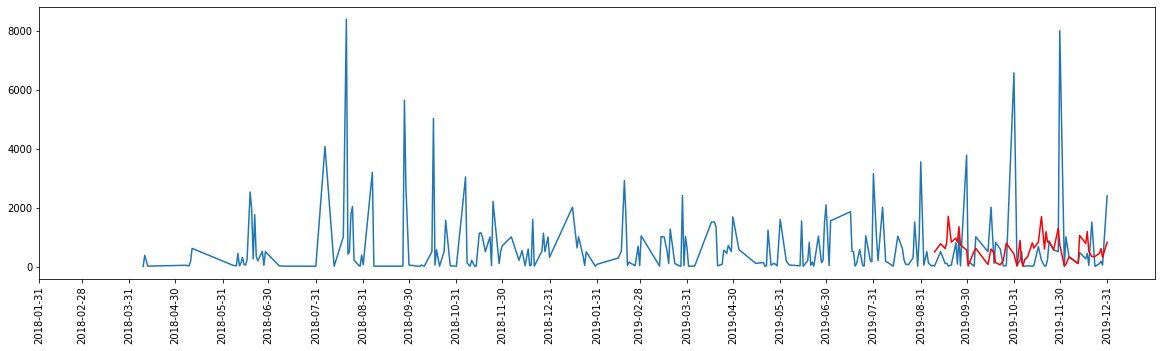

In [74]:
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=clf)

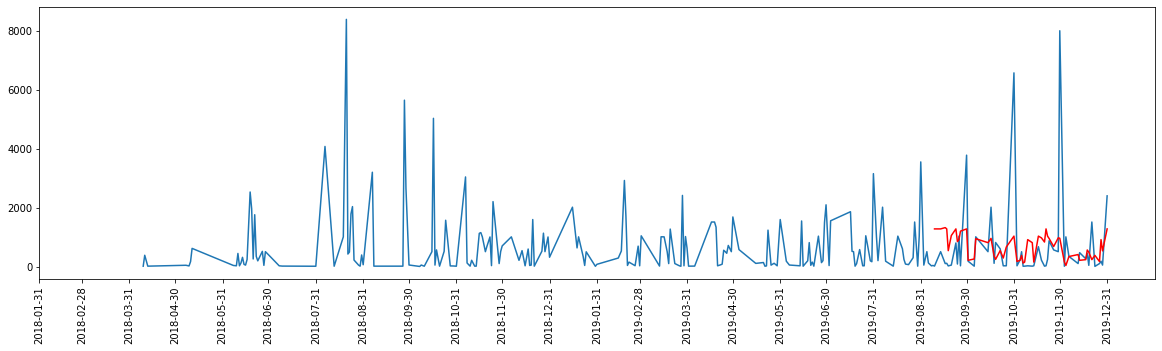

In [80]:
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=clf1)

In [81]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_fil)

(53, 12) (199, 12)


In [82]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

SCORE:                                                                                                                 
2232428.5104675866                                                                                                     
SCORE:                                                                                                                 
2215589.5041020205                                                                                                     
SCORE:                                                                                                                 
2159762.5779537098                                                                                                     
SCORE:                                                                                                                 
2250814.295334044                                                                                                      
SCORE:                                  

In [83]:
best_hyperparams

{'colsample_bytree': 0.6850675492269417,
 'gamma': 5.042750967910079,
 'max_depth': 12.0,
 'min_child_weight': 2.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.6094029353138221}

[0]	validation_0-rmse:1032.48506	validation_1-rmse:1594.69453
[1]	validation_0-rmse:854.28598	validation_1-rmse:1583.62076
[2]	validation_0-rmse:763.18116	validation_1-rmse:1575.56915
[3]	validation_0-rmse:647.86930	validation_1-rmse:1598.21855
[4]	validation_0-rmse:584.64661	validation_1-rmse:1605.70971
[5]	validation_0-rmse:511.77546	validation_1-rmse:1595.68743
[6]	validation_0-rmse:442.70382	validation_1-rmse:1609.04049
[7]	validation_0-rmse:388.48667	validation_1-rmse:1630.04636
[8]	validation_0-rmse:346.42614	validation_1-rmse:1631.49546
[9]	validation_0-rmse:314.99787	validation_1-rmse:1642.75280
[10]	validation_0-rmse:279.57904	validation_1-rmse:1648.82258
[11]	validation_0-rmse:252.33762	validation_1-rmse:1639.33461


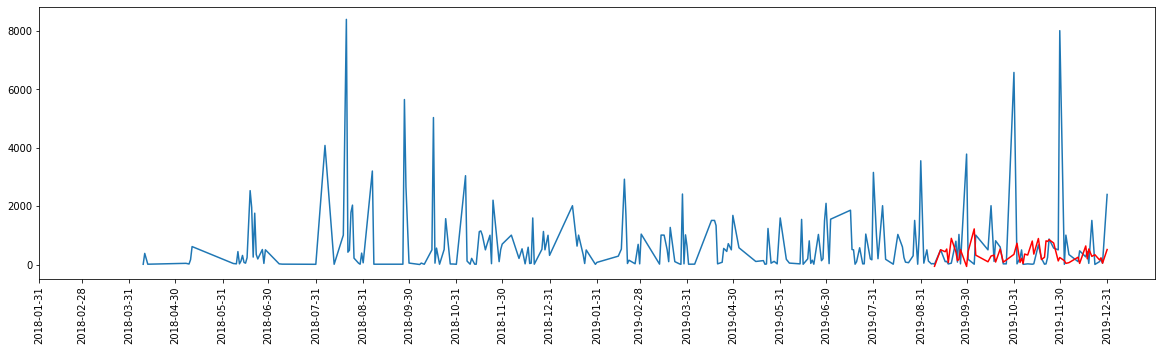

In [84]:
clf2=XGBRegressor(colsample_bytree= 0.6850675492269417,
                 gamma= 5.042750967910079,
                 max_depth= 12,
                 min_child_weight= 2,
                 reg_alpha= 40,
                 reg_lambda= 0.6094029353138221,)
clf2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=clf2)

### using randomizedSearchCV

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
## Hyper Parameter Optimization
n_estimators = [100, 200, 500]
max_depth = [2, 3, 5, 10, 15, 20, 50]
learning_rate=[0.005,0.01,0.05,0.1,0.15,0.20]
min_child_weight=[0,1,2,5]
booster=['gbtree','dart']
gamma =[1,2,3,4,5,6,7,8,9,10]
reg_lambda = [0.01,0.05,0.1,0.2,0.5,0.7,1,5,10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'gamma':gamma,
    'reg_lambda':reg_lambda
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100,
            scoring = 'neg_root_mean_squared_error',n_jobs = 4,
            return_train_score = True,
            verbose=4,
            random_state=42)

In [117]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_all)

(53, 42) (199, 42)


In [118]:
random_cv.fit(X_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'reg_lambda': 10,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 2,
 'learning_rate': 0.01,
 'gamma': 8,
 'booster': 'gbtree'}

In [119]:
xgb = XGBRegressor(n_estimators= 1000,
             min_child_weight= 5,
             max_depth = 2,
             learning_rate = 0.01,
             booster = 'gbtree',
             reg_lambda=10,
             gamma=8,)

In [120]:
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)

[0]	validation_0-rmse:1254.30914	validation_1-rmse:1634.75441
[1]	validation_0-rmse:1250.69092	validation_1-rmse:1631.87406
[2]	validation_0-rmse:1247.12773	validation_1-rmse:1629.14707
[3]	validation_0-rmse:1243.62061	validation_1-rmse:1626.36218
[4]	validation_0-rmse:1240.16610	validation_1-rmse:1623.72582
[5]	validation_0-rmse:1236.76570	validation_1-rmse:1621.05420
[6]	validation_0-rmse:1233.41718	validation_1-rmse:1618.50540
[7]	validation_0-rmse:1230.11974	validation_1-rmse:1615.86624
[8]	validation_0-rmse:1226.87371	validation_1-rmse:1613.40272
[9]	validation_0-rmse:1223.67793	validation_1-rmse:1610.85161
[10]	validation_0-rmse:1220.53165	validation_1-rmse:1608.47088
[11]	validation_0-rmse:1217.43489	validation_1-rmse:1606.05548
[12]	validation_0-rmse:1214.38634	validation_1-rmse:1603.63115
[13]	validation_0-rmse:1211.38397	validation_1-rmse:1601.36924
[14]	validation_0-rmse:1208.42979	validation_1-rmse:1599.14600
[15]	validation_0-rmse:1205.52113	validation_1-rmse:1596.84134
[1

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=8, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

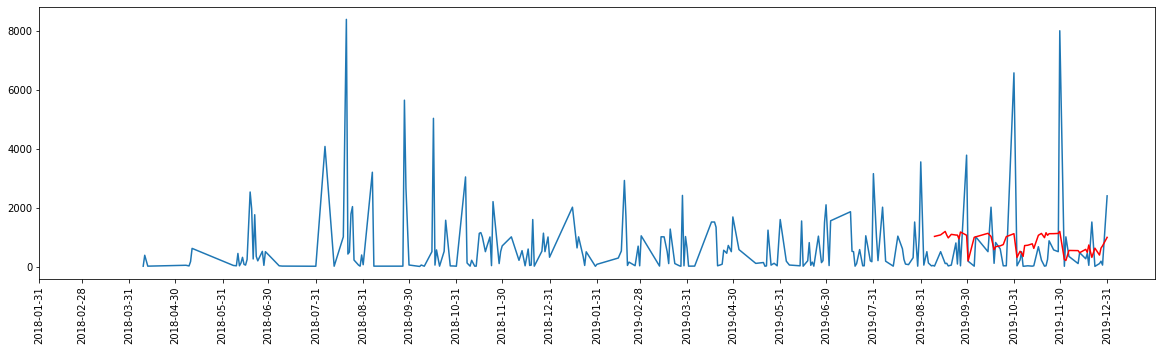

In [121]:
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb)

In [125]:
## Hyper Parameter Optimization
n_estimators = [100]
max_depth = [2, 5, 10, 15]
learning_rate=[0.005,0.01]
min_child_weight=[0,1,2,5,7]
booster=['gbtree']
gamma =[6.5,7,7.5,8,8.5]
reg_lambda = [0.01,0.05,0.1,1,5,10,20]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'gamma':gamma,
    'reg_lambda':reg_lambda
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100,
            scoring = 'neg_root_mean_squared_error',n_jobs = 4,
            return_train_score = True,
            verbose=4)

In [123]:
random_cv.fit(X_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'reg_lambda': 0.01,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.01,
 'gamma': 7.5,
 'booster': 'gbtree'}

[0]	validation_0-rmse:1253.92056	validation_1-rmse:1633.74110
[1]	validation_0-rmse:1249.92519	validation_1-rmse:1629.98488
[2]	validation_0-rmse:1245.99689	validation_1-rmse:1626.30499
[3]	validation_0-rmse:1242.13471	validation_1-rmse:1622.69998
[4]	validation_0-rmse:1238.33765	validation_1-rmse:1619.16884
[5]	validation_0-rmse:1234.60487	validation_1-rmse:1615.71017
[6]	validation_0-rmse:1230.93533	validation_1-rmse:1612.32278
[7]	validation_0-rmse:1227.32817	validation_1-rmse:1609.00549
[8]	validation_0-rmse:1223.78246	validation_1-rmse:1605.75707
[9]	validation_0-rmse:1220.29730	validation_1-rmse:1602.57622
[10]	validation_0-rmse:1216.87182	validation_1-rmse:1599.46195
[11]	validation_0-rmse:1213.50512	validation_1-rmse:1596.41300
[12]	validation_0-rmse:1210.19620	validation_1-rmse:1593.37454
[13]	validation_0-rmse:1206.94426	validation_1-rmse:1590.45293
[14]	validation_0-rmse:1203.74842	validation_1-rmse:1587.54039
[15]	validation_0-rmse:1200.60777	validation_1-rmse:1584.74349
[1

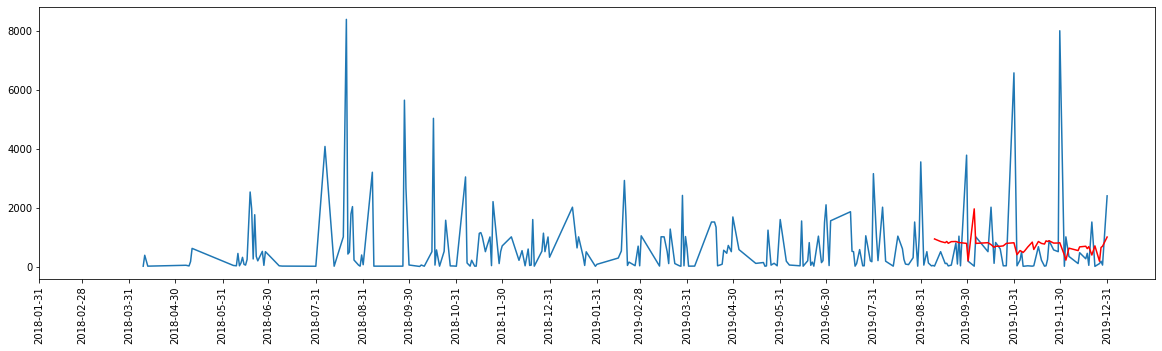

In [127]:
xgb = XGBRegressor(n_estimators= 1000,
             min_child_weight= 1,
             max_depth = 2,
             learning_rate = 0.01,
             booster = 'gbtree',
             reg_lambda=0.01,
             gamma=7.5)
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb)

In [126]:
random_cv.fit(X_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'reg_lambda': 0.01,
 'n_estimators': 100,
 'min_child_weight': 0,
 'max_depth': 2,
 'learning_rate': 0.01,
 'gamma': 6.5,
 'booster': 'gbtree'}

[0]	validation_0-rmse:1253.92056	validation_1-rmse:1633.74110
[1]	validation_0-rmse:1249.92519	validation_1-rmse:1629.98488
[2]	validation_0-rmse:1245.99689	validation_1-rmse:1626.30499
[3]	validation_0-rmse:1242.13471	validation_1-rmse:1622.69998
[4]	validation_0-rmse:1238.33765	validation_1-rmse:1619.16884
[5]	validation_0-rmse:1234.60487	validation_1-rmse:1615.71017
[6]	validation_0-rmse:1230.93533	validation_1-rmse:1612.32278
[7]	validation_0-rmse:1227.32817	validation_1-rmse:1609.00549
[8]	validation_0-rmse:1223.78246	validation_1-rmse:1605.75707
[9]	validation_0-rmse:1220.29730	validation_1-rmse:1602.57622
[10]	validation_0-rmse:1216.87182	validation_1-rmse:1599.46195
[11]	validation_0-rmse:1213.50512	validation_1-rmse:1596.41300
[12]	validation_0-rmse:1210.19620	validation_1-rmse:1593.37454
[13]	validation_0-rmse:1206.94426	validation_1-rmse:1590.45293
[14]	validation_0-rmse:1203.74842	validation_1-rmse:1587.54039
[15]	validation_0-rmse:1200.60777	validation_1-rmse:1584.74349
[1

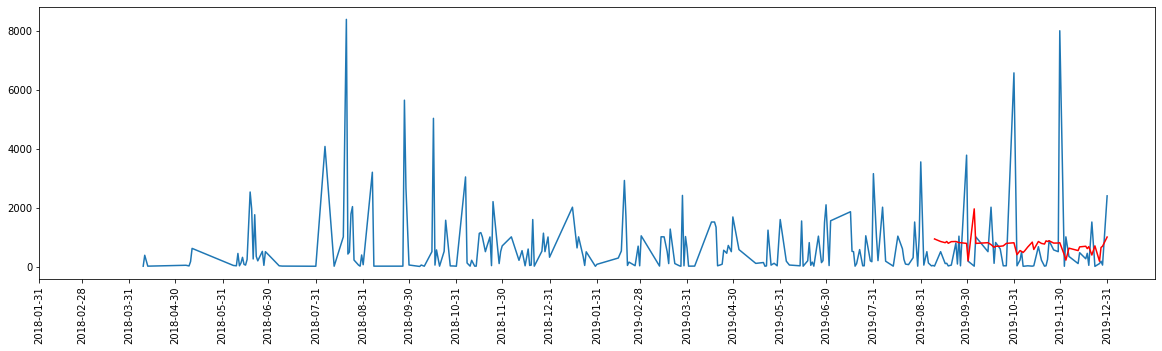

In [128]:
xgb = XGBRegressor(n_estimators= 1000,
             min_child_weight= 0,
             max_depth = 2,
             learning_rate = 0.01,
             booster = 'gbtree',
             reg_lambda=0.01,
             gamma=6.5)
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb)

In [129]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_fil)

(53, 12) (199, 12)


In [130]:
random_cv.fit(X_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'reg_lambda': 5,
 'n_estimators': 100,
 'min_child_weight': 0,
 'max_depth': 2,
 'learning_rate': 0.01,
 'gamma': 8,
 'booster': 'gbtree'}

[0]	validation_0-rmse:1255.50262	validation_1-rmse:1634.59313
[1]	validation_0-rmse:1253.03966	validation_1-rmse:1631.64263
[2]	validation_0-rmse:1250.59495	validation_1-rmse:1628.72338
[3]	validation_0-rmse:1248.16838	validation_1-rmse:1625.83508
[4]	validation_0-rmse:1245.75983	validation_1-rmse:1622.97755
[5]	validation_0-rmse:1243.36920	validation_1-rmse:1620.15049
[6]	validation_0-rmse:1240.99635	validation_1-rmse:1617.35380
[7]	validation_0-rmse:1238.64122	validation_1-rmse:1614.58721
[8]	validation_0-rmse:1236.30366	validation_1-rmse:1611.85051
[9]	validation_0-rmse:1233.98365	validation_1-rmse:1609.14348
[10]	validation_0-rmse:1231.68099	validation_1-rmse:1606.46590
[11]	validation_0-rmse:1229.39557	validation_1-rmse:1603.81761
[12]	validation_0-rmse:1227.12729	validation_1-rmse:1601.19840
[13]	validation_0-rmse:1224.87599	validation_1-rmse:1598.60807
[14]	validation_0-rmse:1222.64162	validation_1-rmse:1596.04628
[15]	validation_0-rmse:1220.42408	validation_1-rmse:1593.51295
[1

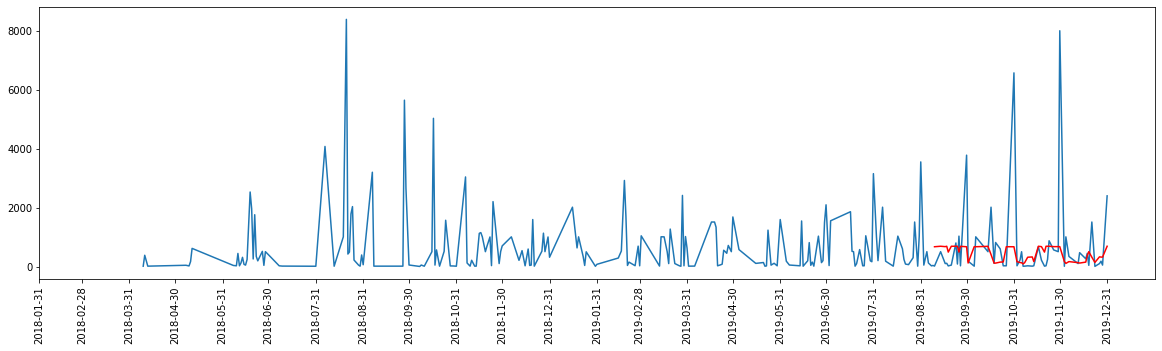

In [131]:
xgb = XGBRegressor(n_estimators= 1000,
             min_child_weight= 0,
             max_depth = 2,
             learning_rate = 0.01,
             booster = 'gbtree',
             reg_lambda=5,
             gamma=8)
xgb1.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10)
plot_predictions(X_test=X_test,test_df=test_df,df=df_all,model=xgb1)